# Book Sales Exploratory Data Analysis

This Notebook explores the **Book Sales and Ratings** dataset from Kaggle, found at [this link](https://www.kaggle.com/datasets/thedevastator/books-sales-and-ratings/data).

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [163]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thedevastator/books-sales-and-ratings")

print("Path to dataset files:", path)

Path to dataset files: /Users/elenaertle/.cache/kagglehub/datasets/thedevastator/books-sales-and-ratings/versions/2


In [164]:
df = pd.read_csv('/Users/elenaertle/.cache/kagglehub/datasets/thedevastator/books-sales-and-ratings/versions/2/Books_Data_Clean.csv')
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

In [166]:
df.columns

Index(['index', 'Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold'],
      dtype='object')

In [167]:
df.rename(columns={"Publisher " : "Publisher"},inplace=True)

In [168]:
df.columns

Index(['index', 'Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher', 'units sold'],
      dtype='object')

In [169]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


## Cleaning

In [170]:
#find out how many null entries exist
df.isnull().sum()

index                   0
Publishing Year         1
Book Name              23
Author                  0
language_code          53
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [171]:
#find out how many distinct elements are in each column
df.nunique()

index                  1070
Publishing Year         150
Book Name              1045
Author                  735
language_code             8
Author_Rating             4
Book_average_rating     134
Book_ratings_count     1064
genre                     4
gross sales             831
publisher revenue       610
sale price              149
sales rank              865
Publisher                 9
units sold              491
dtype: int64

In [172]:
#distinct genres
df["genre"].unique()

array(['genre fiction', 'fiction', 'nonfiction', 'children'], dtype=object)

In [173]:
#replace the genre "genre fiction" by "fiction"
df["genre"] = df["genre"].replace({"genre fiction": "fiction",})

In [174]:
#distinct Author ratings
df["Author_Rating"].unique()

array(['Novice', 'Intermediate', 'Famous', 'Excellent'], dtype=object)

In [175]:
#distinct language codes, fill empty entries with "unkown"
df["language_code"] = df["language_code"].fillna("unknown")
df["language_code"].unique()

array(['en-US', 'eng', 'unknown', 'spa', 'en-GB', 'fre', 'en-CA', 'nl',
       'ara'], dtype=object)

In [176]:
#distinct publishers
df["Publisher"].unique()

array(['HarperCollins Publishers', 'Amazon Digital Services,  Inc.',
       'Hachette Book Group', 'Penguin Group (USA) LLC',
       'Random House LLC', 'Simon and Schuster Digital Sales Inc',
       'Macmillan', 'HarperCollins Publishing',
       'HarperCollins Christian Publishing'], dtype=object)

In [177]:
#fix harper collins entries
df["Publisher"] = df["Publisher"].replace({"HarperCollins Publishers":"HarperCollins","HarperCollins Publishing":"HarperCollins", "HarperCollins Christian Publishing": "HarperCollins"})
df["Publisher"].unique()

array(['HarperCollins', 'Amazon Digital Services,  Inc.',
       'Hachette Book Group', 'Penguin Group (USA) LLC',
       'Random House LLC', 'Simon and Schuster Digital Sales Inc',
       'Macmillan'], dtype=object)

In [178]:
#fill in categorical/text columns
cat_cols = ['Book Name', 'Author', 'language_code', 'genre', 'Publisher']
df[cat_cols] = df[cat_cols].fillna("unknown")

#fill in numeric columns
num_cols = ['Publishing Year', 'Author_Rating', 'Book_average_rating',
            'Book_ratings_count', 'gross sales', 'publisher revenue',
            'sale price', 'sales rank', 'units sold']
df[num_cols] = df[num_cols].ffill()

In [179]:
#find rows with negative years
negative_years = df[df["Publishing Year"] < 0]
print(negative_years)

#drop these rows
df = df[df["Publishing Year"] >= 0]

#check earliest year
print(df["Publishing Year"].min())


     index  Publishing Year                           Book Name  \
241    241           -380.0                    Î Î¿Î»Î¹Ï„ÎµÎ¯Î±   
293    293           -430.0  ÎŸá¼°Î´Î¯Ï€Î¿Ï…Ï‚ Î¤ÏÏÎ±Î½Î½Î¿Ï‚   
568    568           -300.0          é“å¾·ç¶“ [dÃ o dÃ© jÄ«ng]   
589    589           -560.0                            Aesopica   
749    749            -17.0                              Ã†neis   
990    990           -441.0                   á¼ˆÎ½Ï„Î¹Î³ÏŒÎ½Î·   

                                                Author language_code  \
241                                 Plato, Desmond Lee           eng   
293                             Sophocles, J.E. Thomas           eng   
568  Lao Tzu, Gia-Fu Feng, Jane English, Chungliang...           eng   
589                   Aesop, Laura Harris, Laura Gibbs           eng   
749                          Virgil, Robert Fitzgerald           eng   
990                             Sophocles, J.E. Thomas           eng   

    Author_Rating  Book_a

In [180]:
# Find rows with unusual characters
nonsensical_books = df[~df["Book Name"].str.match(r'^[A-Za-z0-9\s\-\.,:;!?\'"&#()*]+$')]
print(nonsensical_books.head(20))
print("Number of nonsensical book names:" ,len(nonsensical_books))
df = df[df["Book Name"].str.match(r'^[A-Za-z0-9\s\-\.,:;!?\'"&#()*]+$')]

     index  Publishing Year  \
54      54           2004.0   
61      61           1967.0   
83      83           1925.0   
118    118           2009.0   
120    120           1909.0   
138    138           1982.0   
171    171           2009.0   
189    189           2002.0   
261    261           1812.0   
272    272           1999.0   
278    278           1932.0   
279    279           2003.0   
304    304           1999.0   
309    309           1975.0   
337    337           1945.0   
338    338           2006.0   
362    362           2002.0   
389    389           2011.0   
391    391           1997.0   
484    484           1927.0   

                                             Book Name  \
54   ãƒ‡ã‚¹ãƒŽãƒ¼ãƒˆ #1 (Desu NÅto) Taikutsu (é€€å±ˆ)   
61                  ÐœÐ°ÑÑ‚ÐµÑ€ Ð¸ ÐœÐ°Ñ€Ð³Ð°Ñ€Ð¸Ñ‚Ð°   
83                                         Der ProzeÃŸ   
118  ã„ã¡ãã‚…ã†ã¯ã¡ã‚ˆã‚“ [Ichi-KyÅ«-Hachi-Yon]   
120                            Le FantÃ´me de l'OpÃ©ra   


## Exploratory Questions

#### 1. Distribution of Author Ratings and Average Book Ratings and computing the Average Book Rating for each Author Rating

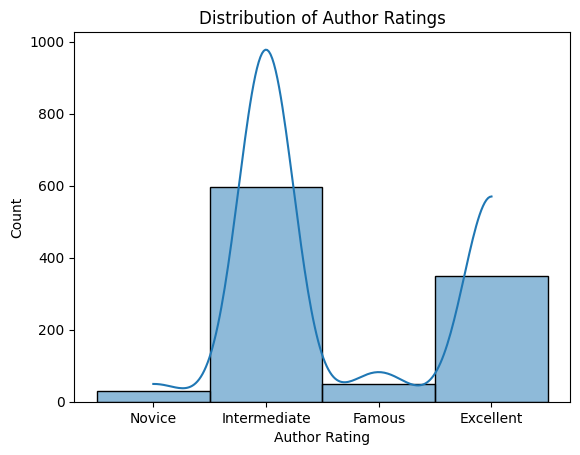

In [181]:
#distribution of author ratings
import seaborn as sns
sns.histplot(df["Author_Rating"], bins = 30, kde = True)
plt.xlabel("Author Rating")
plt.ylabel("Count")
plt.title("Distribution of Author Ratings")
plt.show()

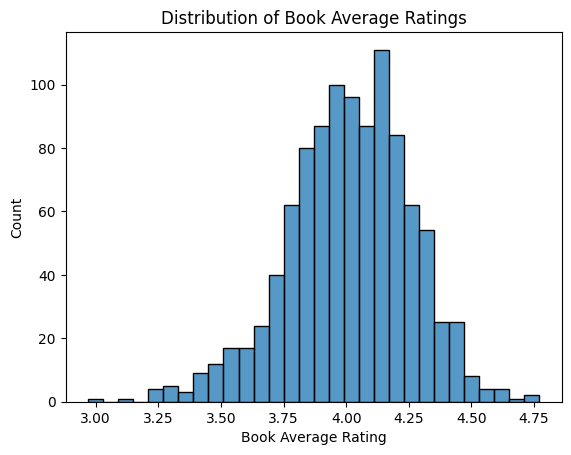

In [182]:
#distribution of average book ratings
sns.histplot(df["Book_average_rating"], bins = 30, kde = False)
plt.xlabel("Book Average Rating")
plt.ylabel("Count")
plt.title("Distribution of Book Average Ratings")
plt.show()

In [183]:
#show average book ratings by each author category
avg_rating_by_cat = df.groupby("Author_Rating")["Book_average_rating"].mean()
print(avg_rating_by_cat)

Author_Rating
Excellent       4.165661
Famous          4.439200
Intermediate    3.908442
Novice          3.369000
Name: Book_average_rating, dtype: float64


#### 2. Explore which Publisher has the highest revenue and most units sold

Publisher
Amazon Digital Services,  Inc.          5783930
Random House LLC                        1267925
Penguin Group (USA) LLC                  890075
HarperCollins                            644241
Hachette Book Group                      537128
Simon and Schuster Digital Sales Inc     457040
Macmillan                                334344
Name: units sold, dtype: int64


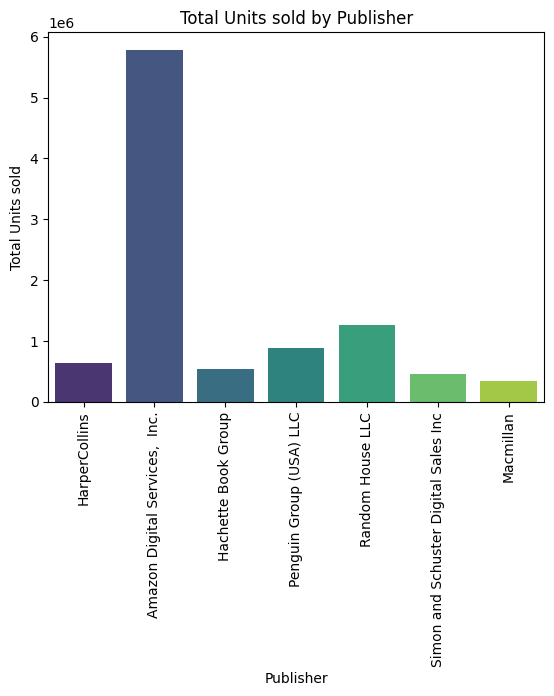

In [184]:
#find out which publisher has sold the most units
publisher_units_sold = df.groupby("Publisher")["units sold"].sum().sort_values(ascending=False)
print(publisher_units_sold)

#visualise with a barplot
sns.barplot(data=df, x="Publisher", y="units sold", estimator=sum, errorbar=None, hue = "Publisher", palette="viridis")
plt.xticks(rotation=90)
plt.ylabel("Total Units sold")
plt.title("Total Units sold by Publisher")
plt.show()

Amazon Digital Sevices, Inc. has sold the most units: 5,783,930

Publisher
Penguin Group (USA) LLC                 209520.690
Random House LLC                        188965.644
Amazon Digital Services,  Inc.          145465.506
Hachette Book Group                     133109.994
HarperCollins                           131547.792
Simon and Schuster Digital Sales Inc     39434.790
Macmillan                                29235.846
Name: publisher revenue, dtype: float64


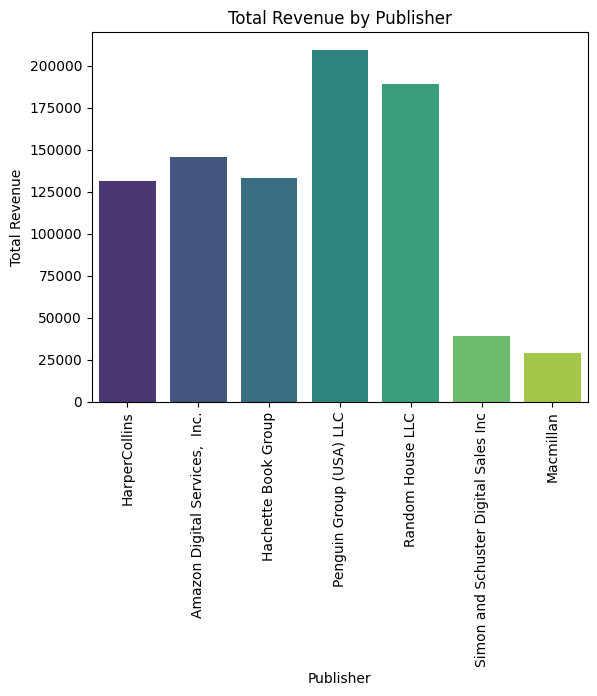

In [185]:
#which publisher has the highest revenue

publisher_revenue = df.groupby("Publisher")["publisher revenue"].sum().sort_values(ascending=False)
print(publisher_revenue)

#visualise in a barplot
sns.barplot(data=df, x="Publisher", y="publisher revenue", estimator=sum, errorbar=None, hue = "Publisher", palette="viridis")
plt.xticks(rotation=90)
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Publisher")
plt.show()

Penguin Group (USA) LLC's total revenue is  209,520.690, higher than the revenues of all other publishers.

genre
fiction       8049916
nonfiction    1566649
children       298118
Name: units sold, dtype: int64


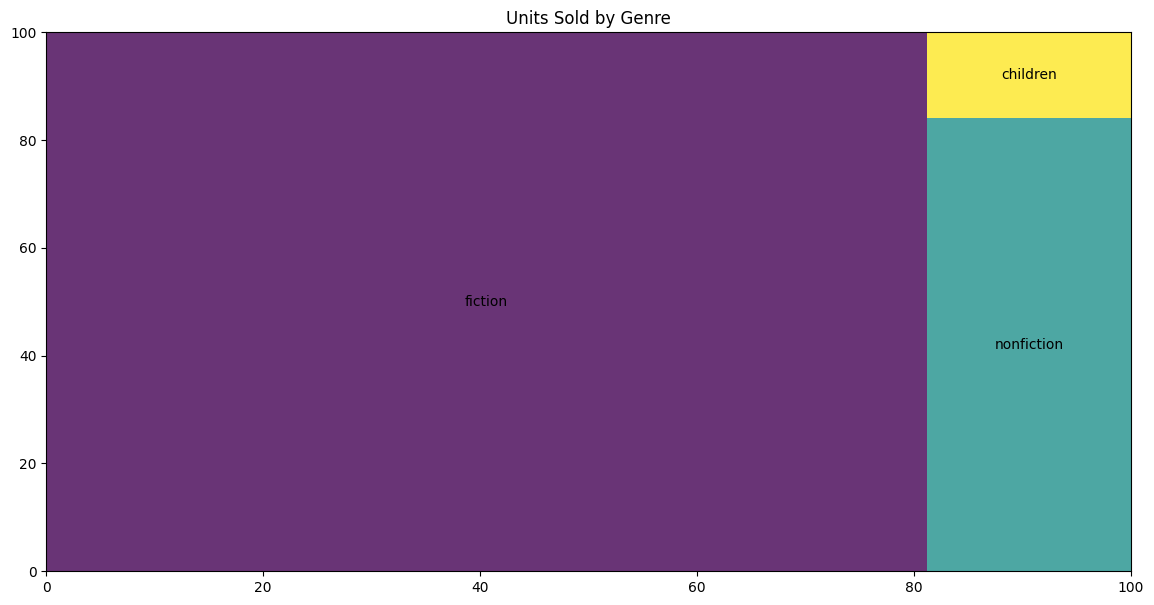

In [186]:
#make a treemap to see how the different genres contribute to overall sales
import squarify
import matplotlib.pyplot as plt

#aggregate total units sold by genre
genre_sales = df.groupby("genre")["units sold"].sum().sort_values(ascending=False)

print(genre_sales)

#normalise hte values for colouring
norm = np.linspace(0,1, len(genre_sales))
colours = plt.cm.viridis(norm)

#make treemap
plt.figure(figsize = (14,7))
squarify.plot(sizes = genre_sales.values, label = genre_sales.index, alpha = 0.8, color = colours)
plt.title("Units Sold by Genre")
plt.show()


We can see that the best selling genre is fiction, with a total amount of 8,049,916 units sold.

In [187]:
#make the same treemap but interactive
import plotly.express as px

genre_sales_alt = df.groupby("genre")["units sold"].sum().reset_index()
figure = px.treemap(genre_sales_alt, path = ["genre"], values = "units sold", color = "units sold",color_continuous_scale = "viridis", hover_name = "units sold")
figure.show()

#### 4. Who are the highest earning authors and how do they compare when looking at their average book ratings?


In [188]:
#find highest earning authors
author_revenue = df.groupby("Author")["gross sales"].sum().sort_values(ascending=False).reset_index()
print("The 10 highest earning authors are: \n", author_revenue.head(10))

The 10 highest earning authors are: 
                    Author  gross sales
0              Harper Lee     47795.00
1            Stephen King     43322.65
2           David Sedaris     42323.41
3        Charlaine Harris     39453.08
4            Laini Taylor     38278.41
5  Unknown, Seamus Heaney     34160.00
6            Sarah Dessen     31034.85
7          Colleen Hoover     30882.07
8              C.S. Lewis     28972.57
9       Brandon Sanderson     28877.45


In [189]:
#compute average rating for each author
avg_author_rating = df.groupby("Author")["Book_average_rating"].mean().sort_values(ascending= False).reset_index()
print("The 10 authors with the highest average ratings are: \n", avg_author_rating.head(10))

The 10 authors with the highest average ratings are: 
                              Author  Book_average_rating
0                    Bill Watterson                4.650
1      Bill Watterson, G.B. Trudeau                4.610
2                    J.R.R. Tolkien                4.590
3                George R.R. Martin                4.560
4                     Sarah J. Maas                4.526
5                         Kate Egan                4.510
6                   Cassandra Clare                4.480
7                    Art Spiegelman                4.470
8                    Larry McMurtry                4.470
9  Arthur Conan Doyle, Kyle Freeman                4.460


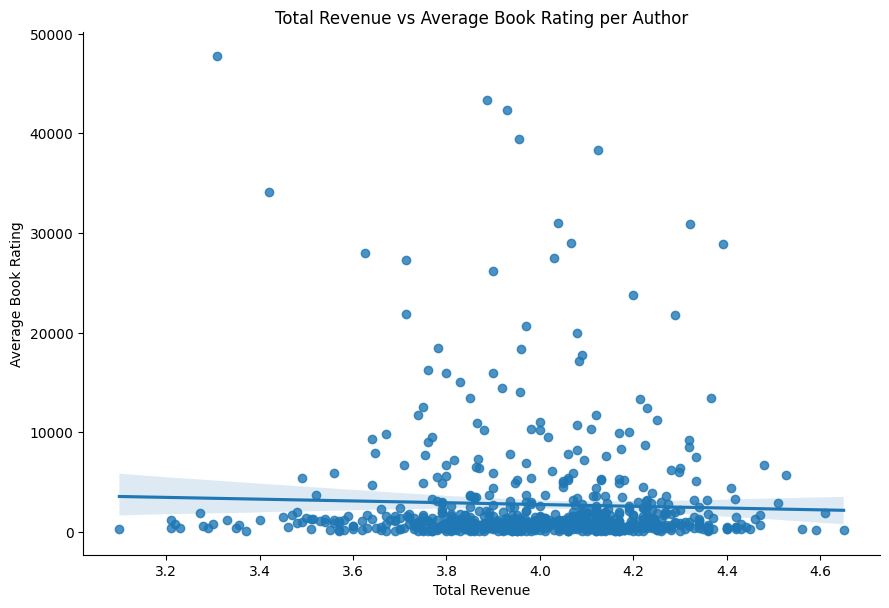

The correlation coefficient of Total Revenue and Average Rating is : -0.04


In [190]:
#what is the correlation between earnings and average ratings

#merge the two data frames
author_stats = pd.merge(author_revenue, avg_author_rating, on = "Author")

#rename columns for clarity
author_stats.columns = ["Author", "Total_Revenue", "Avg_Ratings"]
author_stats.head()

#scatterplot with regression line
sns.lmplot(
    data=author_stats,
    x = "Avg_Ratings",
    y = "Total_Revenue",
    height = 6,
    aspect = 1.5)

plt.xlabel("Total Revenue")
plt.ylabel("Average Book Rating")
plt.title("Total Revenue vs Average Book Rating per Author")
plt.show()

#compute correlation coefficient
corr_coeff = round(author_stats["Total_Revenue"].corr(author_stats["Avg_Ratings"]),2)
print("The correlation coefficient of Total Revenue and Average Rating is :",corr_coeff)


Since the correlation coefficient is almost zero, the two attributes are essentially unrelated. Contrary to what one might think, authors with higher ratings do not consistently earn more money.

#### 5. Identify trends in the Publishing Year column and find out how the author ratings vary for books published pre or post the year 2000.

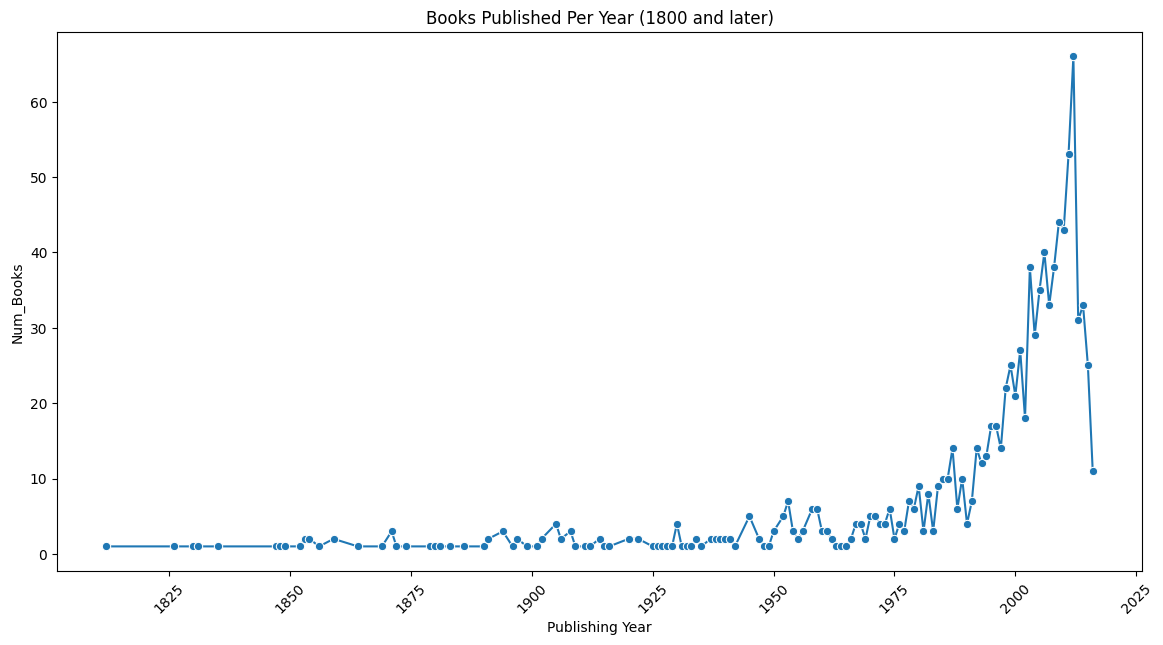

In [194]:
#amount of books published each year
yearly_stats = df.groupby("Publishing Year")["Book Name"].count().reset_index()
yearly_stats.rename(columns={"Book Name": "Num_Books"}, inplace=True)

#make a line chart for published books after 1800
yearly_stats_filtered = yearly_stats[yearly_stats["Publishing Year"] >= 1800]

plt.figure(figsize=(14,7))
sns.lineplot(data=yearly_stats_filtered, x="Publishing Year", y="Num_Books", marker="o")
plt.xticks(rotation=45)
plt.title("Books Published Per Year (1800 and later)")
plt.show()

One can see from the graph that the book publishing industry had a huge boom around 2000, with the rise of the internet and other tech innovations.


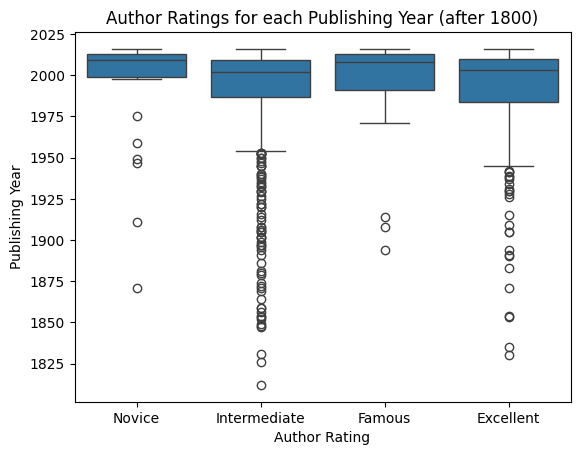

In [198]:
#variation of author ratings before and after 2000

#only look at data after 1800, to make trends more visible
df_filtered = df[df["Publishing Year"] >= 1800]

#boxplot visualisation
sns.boxplot(data = df_filtered, x = "Author_Rating", y = "Publishing Year")
plt.xlabel("Author Rating")
plt.ylabel("Publishing Year")
plt.title("Author Ratings for each Publishing Year (after 1800)")
plt.show()

For each author rating, most of the books are recorded around the year 2000 and after, corresponding to the huge boom in publishing.

#### 6. Build a regression model to predict the variable "units sold" based on "Book_average_rating", "gross_sales" and "sale price"

In [220]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor

#decide target and features
target = "units sold"
features = ["Book_average_rating","gross sales", "sale price"]

#select data
X = df[features]
y = df[target]

#split data (80% training, 20% learning)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#initialise model
model = LinearRegression()

#train model
model.fit(X_train, y_train)

#predict
y_pred = model.predict(X_test)

#evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R^2:", r2)

MSE: 219318583.7639748
R^2: 0.01570454457604764


In [221]:
#random forest solution
rf = RandomForestRegressor(n_estimators = 300, random_state = 42, max_depth = None)

#train
rf.fit(X_train, y_train)

#predict
y_pred_rf = rf.predict(X_test)

print("R^2 (Random Forest):", r2_score(y_test, y_pred_rf))


R^2 (Random Forest): 0.5528409890100695


Since the models are not good enough, we take more features into account.

In [222]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

#divide columns into categories
numeric_features = ["Book_average_rating", "gross sales", "sale price", "Publishing Year", "Book_ratings_count", "publisher revenue", "sales rank"]
categorical_features = ["genre", "language_code", "Author_Rating", "Publisher"]
text_features = ["Book Name", "Author"]

#preprocess
preprocess = ColumnTransformer(transformers=[
    ("num", "passthrough", numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"),categorical_features),
     ("txt1", TfidfVectorizer(max_features=2000), "Book Name"),
        ("txt2", TfidfVectorizer(max_features=2000), "Author")
])

#combine features into single list
all_features = numeric_features + categorical_features + text_features

#select data
XX = df[all_features]
yy = df["units sold"]

#split data (80% training, 20% learning)
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size = 0.2, random_state = 42)

#model
model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("rf", RandomForestRegressor(n_estimators=300, random_state=42))
])

#fit model
model.fit(XX_train, yy_train)

#evaluate
yy_pred = model.predict(XX_test)

mse = mean_squared_error(yy_test, yy_pred)
r2 = r2_score(yy_test, yy_pred)

print("MSE:", mse)
print("R^2:", r2)
print("Score with Random Forest regressor is :", r2)

MSE: 83660.44969447154
R^2: 0.9996245343234497
Score with Random Forest regressor is : 0.9996245343234497
